*ACV WIDER Face Detection Project*

In [1]:
# Mounting the drive for uploading the data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Importing libraries for building the model
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import cv2
import os

In [0]:
#1) Load dataset in npy format

img_array = np.load('/content/drive/My Drive/images.npy',allow_pickle=True)

In [6]:
# Checking the shape of the source

print('number of images in the given dataset is: ',img_array.shape[0])

number of images in the given dataset is:  409


In [7]:
# Checking to see for shape other than (width, Height, 3)

for i in range(0,img_array.shape[0]):
  try:
    if img_array[i][0].shape[2]>3:
      print(i,img_array[i][0].shape)
  except:
    print(i,img_array[i][0].shape)

1 (697, 1280, 4)
3 (291, 600, 4)
41 (340, 516, 4)
49 (600, 800, 4)
64 (312, 750, 4)
140 (330, 538, 4)
151 (496, 860, 4)
247 (379, 505, 4)
263 (400, 770, 4)
272 (350, 650)
337 (267, 740, 4)
347 (281, 600, 4)


We can observe that there are few more then 3 channels images and 1 channel image, that needs to be handled for building the model

Image index number:  10


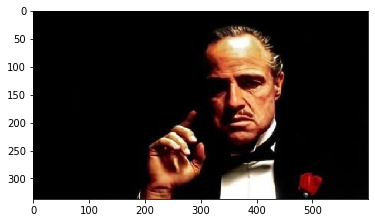

In [8]:
#Randomly viewing the images

img_num=np.random.randint(0,img_array.shape[0])
plt.imshow(img_array[img_num][0])
print('Image index number: ',img_num)

In [11]:
#Checking for the annotation details

img_array[img_num][1]

[{'imageHeight': 337,
  'imageWidth': 600,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.48, 'y': 0.10385756676557864},
   {'x': 0.7716666666666666, 'y': 0.6795252225519288}]}]

There are 2 faces in the image along with image height, width, x and y

In [0]:
# Reading the image with 2 faces

Data_set=[]
IMAGE_SIZE_Width=128
IMAGE_SIZE_Height=128
Data_set=[]
for j in range(0,img_array.shape[0]):
  image_name='image_'+ str(j+1)
  for i in img_array[j][1]:
    ori_Height=i['imageHeight']
    Ori_Width=i['imageWidth']
    label=i['label'][0]
    x1_ratio=i['points'][0]['x']
    x2_ratio=i['points'][1]['x']
    y1_ratio=i['points'][0]['y']
    y2_ratio=i['points'][1]['y']
    x1_ori=int((i['points'][0]['x'])*Ori_Width)
    x2_ori=int((i['points'][1]['x'])*Ori_Width)
    y1_ori=int((i['points'][0]['y'])*ori_Height)
    y2_ori=int((i['points'][1]['y'])*ori_Height)
    x_min=int((i['points'][0]['x'])*IMAGE_SIZE_Width)
    x_max=int((i['points'][1]['x'])*IMAGE_SIZE_Width)
    y_min=int((i['points'][0]['y'])*IMAGE_SIZE_Height)
    y_max=int((i['points'][1]['y'])*IMAGE_SIZE_Height)
    Data_set.append([image_name,ori_Height,Ori_Width,label,x1_ratio,x2_ratio,y1_ratio,y2_ratio,x1_ori,x2_ori,y1_ori,y2_ori,x_min,y_min,x_max,y_max])


In [13]:
# Converting the image attributes into a dataframe

df=pd.DataFrame(Data_set,columns=['filename','ori_Height','Ori_Width','class','x1_ratio','x2_ratio','y1_ratio','y2_ratio','x1_ori','x2_ori','y1_ori','y2_ori','x_min','y_min','x_max','y_max'])
df.head()

,filename,ori_Height,Ori_Width,class,x1_ratio,x2_ratio,y1_ratio,y2_ratio,x1_ori,x2_ori,y1_ori,y2_ori,x_min,y_min,x_max,y_max
0,image_1,333,650,Face,0.086154,0.172308,0.306306,0.453453,56,112,102,151,11,39,22,58
1,image_1,333,650,Face,0.583077,0.658462,0.291291,0.468468,379,428,97,156,74,37,84,59
2,image_2,697,1280,Face,0.705309,0.769231,0.232604,0.361829,902,984,162,252,90,29,98,46
3,image_3,240,460,Face,0.469565,0.606522,0.050000,0.333333,216,279,12,80,60,6,77,42
4,image_3,240,460,Face,0.628261,0.745652,0.008333,0.308333,289,343,2,74,80,1,95,39


In [14]:
# Finding the total number of unique images

len(df['filename'].unique())

409

In [15]:
print('Number of Classes in the dataset: ',len(df['class'].unique()))

Number of Classes in the dataset:  1


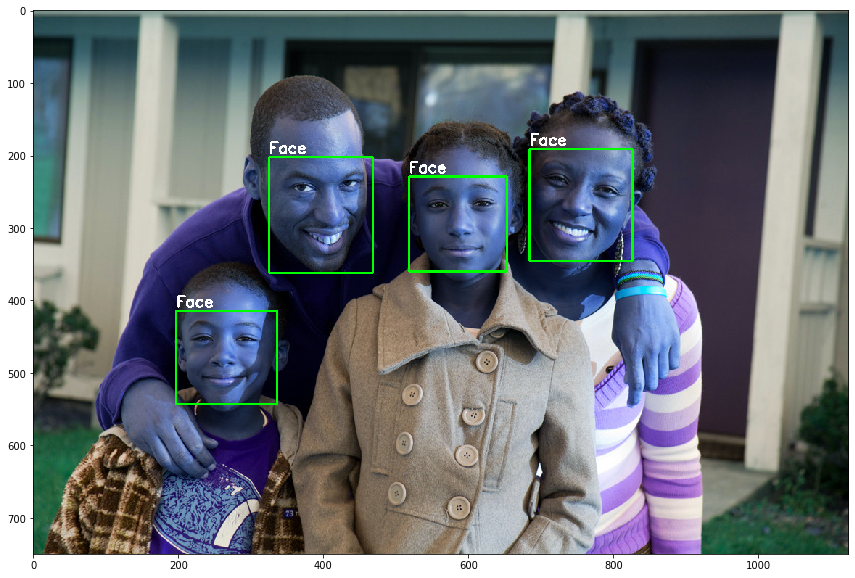

In [16]:
# Visualize the data
#Pickup a random image number
img_num = np.random.randint(0, df.shape[0])
#img_num=5

#Read the image
img_file = df.loc[img_num,'filename']
img_loc=int(df.loc[img_num,'filename'].split('_')[1])-1
img = img_array[img_loc][0]

#Find all rows which have same file name
rows_with_file = df[df['filename'] == img_file].index.tolist()

#Draw rectangle(s) as per bounding box information
for i in rows_with_file:

    #Get bounding box
    xmin, ymin, xmax, ymax = df.loc[i, ['x1_ori', 'y1_ori', 'x2_ori', 'y2_ori']]
    #Get Label
    label = df.loc[i, 'class']
    #Add bounding box
    cv2.rectangle(img, (xmin,ymin), (xmax, ymax), (0,255,0), 2)
    #Add text
    cv2.putText(img,label,(xmin, ymin-5),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

#Convert BGR format (used by opencv to RGB format used by matplotlib)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Draw image using matplotlib
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.show()

In [19]:
#Checking for the annotation details
img_array[10][1]

[{'imageHeight': 337,
  'imageWidth': 600,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.48, 'y': 0.10385756676557864},
   {'x': 0.7716666666666666, 'y': 0.6795252225519288}]}]

In [20]:
# Preprocess the given input to apply tarnsfer learning with mobilenet model

from keras.applications.mobilenet import preprocess_input
IMAGE_HEIGHT=128
IMAGE_WIDTH=128

#masks=np.zeros((int(img_array.shape[0]),IMAGE_HEIGHT,IMAGE_WIDTH))
masks=np.zeros((int(img_array.shape[0]), 4))
X_train=np.zeros((int(img_array.shape[0]),IMAGE_HEIGHT,IMAGE_WIDTH,3))
for index in range(img_array.shape[0]):
  img=img_array[index][0]
  img=cv2.resize(img, dsize=(IMAGE_HEIGHT,IMAGE_WIDTH),interpolation=cv2.INTER_CUBIC)
  try:
    img=img[:,:,:3]
  except:
    continue
  X_train[index]=preprocess_input(np.array(img,dtype=np.float32))
  masks[index,0] = x1_ratio
  masks[index,1] = y1_ratio
  masks[index,2] = x2_ratio
  masks[index,3] = y2_ratio
  #masks[index][y_min:y_max,x_min:x_max]=1

Using TensorFlow backend.


In [21]:
X_train.shape

(409, 128, 128, 3)

In [0]:
from keras.applications.mobilenet import preprocess_input
IMAGE_HEIGHT=128
IMAGE_WIDTH=128

#masks=np.zeros((int(img_array.shape[0]),IMAGE_HEIGHT,IMAGE_WIDTH))
masks=np.zeros((int(img_array.shape[0]), 4))
X_train=np.zeros((int(img_array.shape[0]),IMAGE_HEIGHT,IMAGE_WIDTH,3))
for index in range(img_array.shape[0]):
  img=img_array[index][0]
  img=cv2.resize(img, dsize=(IMAGE_HEIGHT,IMAGE_WIDTH),interpolation=cv2.INTER_CUBIC)
  try:
    img=img[:,:,:3]
  except:
    continue
  X_train[index]=preprocess_input(np.array(img,dtype=np.float32))
  masks[index,0] = x1_ori * IMAGE_WIDTH / Ori_Width
  masks[index,1] = y1_ori * IMAGE_HEIGHT / ori_Height
  masks[index,2] = x2_ori * IMAGE_WIDTH / Ori_Width
  masks[index,3] = y2_ori * IMAGE_HEIGHT / ori_Height

In [23]:
# Print the shape
print(X_train.shape, masks.shape)

(409, 128, 128, 3) (409, 4)


In [24]:
masks[28,1]

65.68762677484787

In [0]:
from PIL import Image
from keras_applications import mobilenet
from keras.applications.mobilenet import preprocess_input
from keras.backend import epsilon
from keras.models import Model
from keras.layers import Conv2D
from keras.layers import Reshape

In [26]:
# Load the pretrained model

from keras.applications.mobilenet import MobileNet
IMAGE_SIZE=128
IMG_SHAPE=(IMAGE_SIZE, IMAGE_SIZE, 3)
model = MobileNet(input_shape=IMG_SHAPE,include_top=False,alpha=1.0)












17227776/17225924 [==============================] - 1s 0us/step


In [0]:
# Freeze all except the Dense layer

for layers in model.layers:
  layers.trainable=False

In [0]:
# Adding a convolution layer to the MobileNet layers
X=model.layers[-1].output
X=Conv2D(4,kernel_size=4)(X)
X=Reshape((4,))(X)

In [29]:
X.shape

TensorShape([Dimension(None), Dimension(4)])

In [30]:
model=Model(inputs=model.input, output=X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("re...)`
  """Entry point for launching an IPython kernel.


Defineing a custum loss function IOU which calculates intersction over Union

In [0]:
def loss(gt,pred):
    intersections = 0
    unions = 0
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height
    
    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

#     Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
        if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
            intersections += intersection[j]
            unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + epsilon()), 4)
    iou = iou.astype(np.float32)
    return iou

def IoU(y_true, y_pred):
    iou = tf.py_func(loss, [y_true, y_pred], tf.float32)
    return iou

In [0]:
from keras import backend as K
import tensorflow as tf

In [33]:
model.compile(optimizer='adam',loss='mse',metrics=[IoU])


Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


In [35]:
model.fit(X_train,masks,epochs=10,batch_size=32,verbose=1)



Epoch 1/10
409/409 [==============================] - 12s 29ms/step - loss: 2754.7583 - IoU: 0.2591
Epoch 2/10
409/409 [==============================] - 11s 27ms/step - loss: 510.3132 - IoU: 0.3691
Epoch 3/10
409/409 [==============================] - 11s 27ms/step - loss: 160.3137 - IoU: 0.5573
Epoch 4/10
409/409 [==============================] - 11s 27ms/step - loss: 106.5571 - IoU: 0.6294
Epoch 5/10
409/409 [==============================] - 11s 26ms/step - loss: 63.8639 - IoU: 0.7092
Epoch 6/10
409/409 [==============================] - 11s 26ms/step - loss: 51.5371 - IoU: 0.7301
Epoch 7/10
409/409 [==============================] - 11s 26ms/step - loss: 45.2625 - IoU: 0.7533
Epoch 8/10
409/409 [==============================] - 11s 26ms/step - loss: 40.2959 - IoU: 0.7622
Epoch 9/10
409/409 [==============================] - 11s 27ms/step - loss: 39.5543 - IoU: 0.7649
Epoch 10/10
409/409 [==============================] - 11s 26ms/step - loss: 34.8339 - IoU: 0.7766


In [0]:
# Model improvement

from keras.applications.mobilenet import MobileNet
IMAGE_SIZE=128
IMG_SHAPE=(IMAGE_SIZE, IMAGE_SIZE, 3)
base_model = MobileNet(input_shape=IMG_SHAPE,include_top=False,alpha=1.0)

In [0]:
base_model.trainable = True

In [38]:
# To find the total layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  87


In [0]:
# Fine-tune from this layer onwards
fine_tune_at = len(base_model.layers)-6

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [40]:
base_model.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32) 

In [0]:
X=base_model.layers[fine_tune_at].output
X=Conv2D(4,kernel_size=4)(X)
X=Reshape((4,))(X)

In [42]:
base_model=Model(inputs=base_model.input, output=X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("re...)`
  """Entry point for launching an IPython kernel.


In [0]:
from keras import backend as K

In [0]:

# Defining Dice coefficient and loss functions

smooth = 1.


def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [0]:
import tensorflow as tf
base_model.compile(optimizer='adam',loss=[dice_coef_loss],metrics=[IoU])


In [46]:
base_model.fit(X_train,masks,epochs=10,batch_size=32,verbose=1)

Epoch 1/10
409/409 [==============================] - 12s 29ms/step - loss: -88.1917 - IoU: 0.0897
Epoch 2/10
409/409 [==============================] - 11s 26ms/step - loss: -137.9501 - IoU: 0.1067
Epoch 3/10
409/409 [==============================] - 11s 26ms/step - loss: -149.3281 - IoU: 0.1924
Epoch 4/10
409/409 [==============================] - 11s 26ms/step - loss: -155.8015 - IoU: 0.1650
Epoch 5/10
409/409 [==============================] - 11s 26ms/step - loss: -160.8994 - IoU: 0.0828
Epoch 6/10
409/409 [==============================] - 11s 26ms/step - loss: -165.5248 - IoU: 0.0234
Epoch 7/10
409/409 [==============================] - 11s 26ms/step - loss: -170.0786 - IoU: 0.0000e+00
Epoch 8/10
409/409 [==============================] - 11s 27ms/step - loss: -174.8476 - IoU: 0.0000e+00
Epoch 9/10
409/409 [==============================] - 11s 26ms/step - loss: -180.1362 - IoU: 3.6675e-04
Epoch 10/10
409/409 [==============================] - 11s 26ms/step - loss: -186.4686 - 

In [47]:
#Pick a test image from the given data

#Pickup a random image number
img_num = np.random.randint(0, X_train.shape[0])
unscaled =  img_array[img_num][0]# Original image for display
image_height, image_width, _ = unscaled.shape
print(image_height,image_width,)

image = cv2.resize(unscaled, (IMAGE_SIZE, IMAGE_SIZE)) # Rescaled image to run the network
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

720 1280


In [48]:
feat_scaled.shape

(128, 128, 3)

In [0]:
# Predict an image

pred = base_model.predict(x=np.array([feat_scaled])) # Predict the BBox

In [56]:
pred

array([[1048.4071 , -525.3101 , 1170.1783 ,  313.53693]], dtype=float32)

In [0]:
pred_1 = base_model.predict(x=np.array([feat_scaled]))[0] # Predict the BBox

In [58]:
pred_1

array([1048.4071 , -525.3101 , 1170.1783 ,  313.53693], dtype=float32)

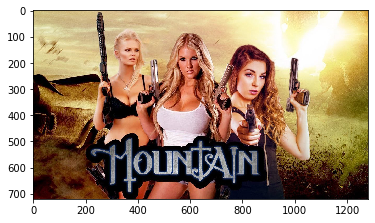

In [61]:
# Visualizing the predicted image

x0 = int(region[0] * Ori_Width / IMAGE_SIZE) # Scale the BBox
y0 = int(region[1] * ori_Height / IMAGE_SIZE)

x1 = int((region[2]) * Ori_Width / IMAGE_SIZE)
y1 = int((region[3]) * ori_Height / IMAGE_SIZE)


import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np


# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), (x1 - x0) , (y1 - y0) , linewidth=2, edgecolor='red', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [62]:
img_num

100

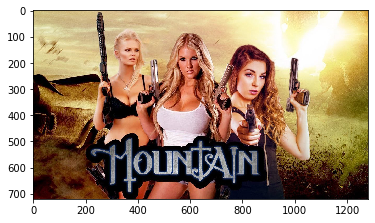

In [63]:
plt.imshow(img_array[img_num][0])